## Importing the required libraries for analysis & plotting

In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading loan csv file from local directory

In [685]:
#intializing path of csv data from the local PC
file_path = '/Users/suryapratapsingh/Desktop/Learning Materials/loan.csv'

#reading csv data in python as a dataframe, setting low_memory to allow data of mixed type to be loaded in the
#notebook without warning
loan_df = pd.read_csv(file_path, low_memory = False)
loan_df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Cleaning & Manipulation

In [686]:
#checking rows & columns of data to understand its volume
loan_df.shape

(39717, 111)

In [687]:
#As there are 111 columns in the dataset, not all of these columns are relevant/necessary to 
#identify defaulters & their patterns for the Lending a loan
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [688]:
#as we can see there are a lot of columns that are completely null, therefore they can be removed
#implementing formulas to automatically identify columns with significant null values
column_df = pd.DataFrame(loan_df.isnull().sum()/len(loan_df)).reset_index().rename(
    columns = {0: 'null_prcntg', 'index': 'column_name'})

#Indentifying columns which are completely null
column_df = column_df[column_df['null_prcntg']==1.0]
column_df

,column_name,null_prcntg
50,mths_since_last_major_derog,1.0
53,annual_inc_joint,1.0
54,dti_joint,1.0
55,verification_status_joint,1.0
57,tot_coll_amt,1.0
58,tot_cur_bal,1.0
59,open_acc_6m,1.0
60,open_il_6m,1.0
61,open_il_12m,1.0
62,open_il_24m,1.0


In [689]:
#removing columns from the parent data
loan_eda_df = loan_df.drop(columns = list(column_df['column_name']))

#the columns have now reduced from 111 to 57 on which we will perform EDA
print(loan_df.shape)
print(loan_eda_df.shape)

(39717, 111)
(39717, 57)


In [690]:
#if we look at the columns on the very right, it seems some of the columns have just '0' or '0.0' in them,
#let's explore to find which columns just contain '0' in them or just 1 unique value
loan_eda_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [691]:
#it seems there are many columns with just 1 unique value, they are mostly with 0, lets remove them
column_df = pd.DataFrame(loan_eda_df.nunique()).reset_index().rename(
    columns = {0: 'one_unique', 'index': 'column_name'})

#automating removal of such columns
loan_eda_df.drop(columns = list(column_df[column_df['one_unique']==1]['column_name']), inplace = True)

In [692]:
#lets increase the maximum number of columns to be displayed by python to see other columns

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [693]:
loan_eda_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [694]:
#since we have removed a lot of irrelevant columns, let's now look at the data type of remaining columns
loan_eda_df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_reco

In [695]:
#it seems like a lot of columns are being listed as objects, lets explore, clean, and set their data types correct

#3 columns that are object are term, int_rate, revol_util, we can see that they cannot
#be classified as integers or float due to 'months' & '%' in them respectively

loan_eda_df['term'] = [int(i.strip('months').strip()) for i in loan_eda_df['term']]
loan_eda_df['int_rate'] = [float(i.strip('%').strip()) for i in loan_eda_df['int_rate']]
loan_eda_df['revol_util'] = [float(str(i).replace('%','').strip()) for i in loan_eda_df['revol_util']]

In [696]:
#Since our objective is to idenitfy customers & their patterns that leads to defaluting of the loan. Therefore,
#we would need an ID to idenitfy customers. let's look for columns that can work as unique identifiers.
print(loan_eda_df.shape)
loan_eda_df.nunique().sort_values(ascending = False)

(39717, 48)


id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26526
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
mths_since_last_record       111
last_credit_pull_d           106
last_pymnt_d                 101
mths_since

In [697]:
#we can see 3 columns: id, member_id, and url that have the same count as the shape of the dataset, therefore
#any one of them can be used as an unique identifier and we drop the rest

loan_eda_df.drop(columns = ['member_id', 'url'], inplace = True)

In [698]:
#converting format of the dates to make it readable as a date
loan_eda_df['issue_d'] = pd.to_datetime(loan_eda_df.issue_d, format='%b-%y')
loan_eda_df['earliest_cr_line'] = pd.to_datetime(loan_eda_df['earliest_cr_line'], format='%b-%y')
loan_eda_df['last_pymnt_d'] = pd.to_datetime(loan_eda_df['last_pymnt_d'], format='%b-%y')
loan_eda_df['next_pymnt_d'] = pd.to_datetime(loan_eda_df['next_pymnt_d'], format='%b-%y')
loan_eda_df['last_credit_pull_d'] = pd.to_datetime(loan_eda_df['last_credit_pull_d'], format='%b-%y')

# Derived Variables

In [699]:
#Creating relevant dervied variables by referring to the use case
#extracting year & month info from loan issue date
loan_eda_df['issue_d_year'] = loan_eda_df['issue_d'].dt.year
loan_eda_df['issue_d_month'] = loan_eda_df['issue_d'].dt.month

In [700]:
loan_eda_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,2011,12
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,2011,12
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,2011,12
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,2011,12
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,1990-11-01,0,0.0,0.0,13,0,7274,13.1,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,2010-07-01,80.90,NaT,2010-06-01,NaN,2007,7
39713,90665,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,1986-12-01,1,5.0,0.0,6,0,8847,26.9,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,2010-07-01,281.94,NaT,2010-07-01,NaN,2007,7
39714,90395,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,1998-10-01,0,0.0,0.0,11,0,9698,19.4,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,2008-04-01,0.00,NaT,2007-06-01,NaN,2007,7
39715,90376,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,NaN,other,JAL Loan,208xx,MD,3.72,0,1988-11-01,0,0.0,0.0,17,0,85607,0.7,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,2008-01-01,0.00,NaT,2007-06-01,NaN,2007,7


# --------------------------------DATA ANALYSIS---------------------------------------

# Univariate Analysis

## Distribution of Annual Income

/var/folders/0f/pyd2ygbs6f3d4zq4v501y0tc0000gn/T/ipykernel_33628/852781506.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=loan_eda_df['annual_inc'])


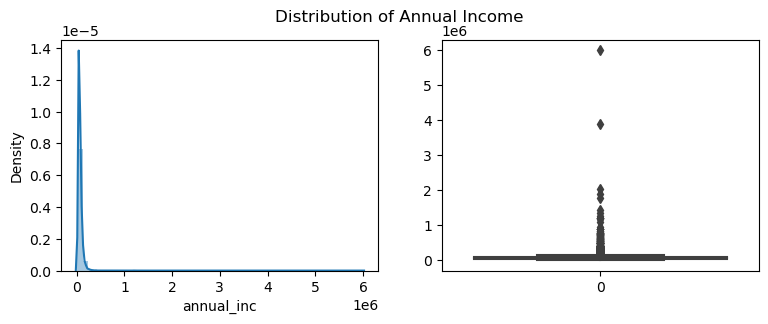

In [701]:
plt.figure(figsize = (9, 3))
plt.subplot(1,2,1)
sns.distplot(a=loan_eda_df['annual_inc'])
plt.subplot(1,2,2)
sns.boxplot(data = loan_eda_df['annual_inc'])
plt.suptitle('Distribution of Annual Income')
plt.show()

### Observation:

It can be observed that most of the income are in the lower bracket with some being the outliers in the upper percentile

## Distribution of Interest Rate

/var/folders/0f/pyd2ygbs6f3d4zq4v501y0tc0000gn/T/ipykernel_33628/2957874054.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=loan_eda_df['int_rate'])


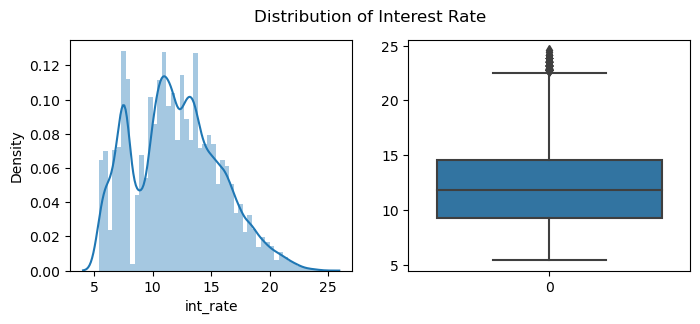

In [702]:
plt.figure(figsize = (8, 3))
plt.subplot(1,2,1)
sns.distplot(a=loan_eda_df['int_rate'])
plt.subplot(1,2,2)
sns.boxplot(data = loan_eda_df['int_rate'])
plt.suptitle('Distribution of Interest Rate')
plt.show()

### Observation:

It seems that the interest rate for most of the people falls in the category of the average loan interest with some being on the lower side indicating that they have a good credit score/track record of paying back the borrowed amount while some being on the higher side showing they can default the loan and run away with the money

## Distribution of Loan Amount

/var/folders/0f/pyd2ygbs6f3d4zq4v501y0tc0000gn/T/ipykernel_33628/2837811124.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=loan_eda_df['loan_amnt'])


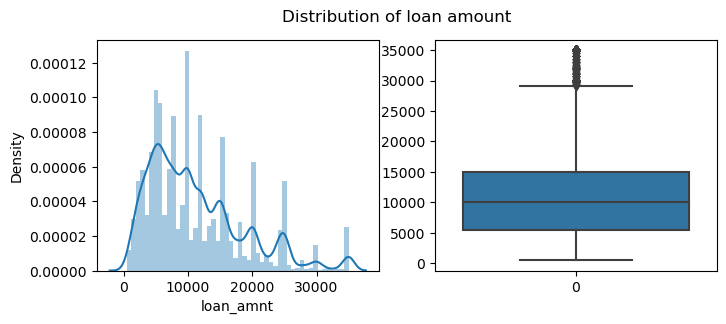

In [703]:
plt.figure(figsize = (8, 3))
plt.subplot(1,2,1)
sns.distplot(a=loan_eda_df['loan_amnt'])
plt.subplot(1,2,2)
sns.boxplot(data = loan_eda_df['loan_amnt'])
plt.suptitle('Distribution of loan amount')
plt.show()

### Observation:

It can be seen in the above plot that # loans ditributed are on the side with lower amount of the loan indicating that the bank is more likely to provide the loan to the borrowers who are less likely to default while the # of loans distributed is significantly less where the loan amount is high and the interest rate is high as well. This reduces the loss that the bank may have to bear in case of a charge off as higher interest on higher amount of loan can lean to quicker recovery of the principal amount disbursed.

## Distribution of Loan Installments

/var/folders/0f/pyd2ygbs6f3d4zq4v501y0tc0000gn/T/ipykernel_33628/3937754571.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=loan_eda_df['installment'])


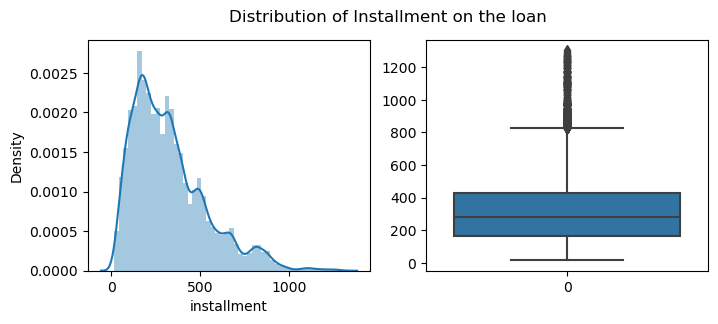

In [704]:
plt.figure(figsize = (8, 3))
plt.subplot(1,2,1)
sns.distplot(a=loan_eda_df['installment'])
plt.subplot(1,2,2)
sns.boxplot(data = loan_eda_df['installment'])
plt.suptitle('Distribution of Installment on the loan')
plt.show()

### Observation:

It seems that most of the loan have the installment in the same range, more can be found in bivariate analysis of observing intallment against loan or interest rate

## Distribution of Purpose for borrowing loan

Text(0.5, 1.0, 'Distribution of Loan purpose')

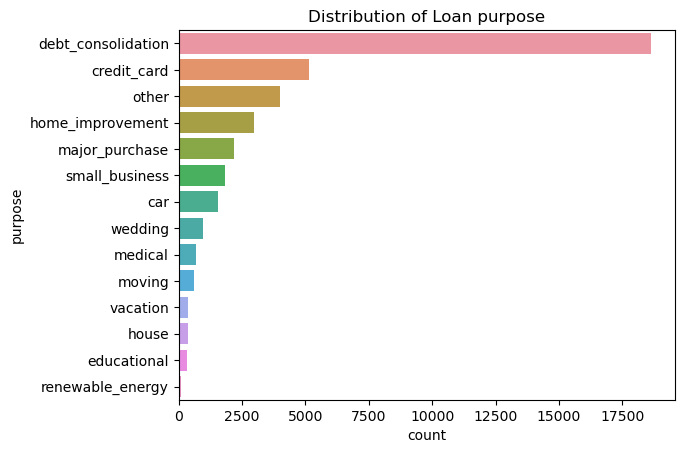

In [705]:
data = loan_eda_df['purpose'].value_counts().reset_index()
column = 'purpose'

sns.barplot(x = 'count', y = column, data = data)
plt.xlabel('count')
plt.ylabel(column)
plt.title('Distribution of Loan purpose')

### Observation:

It can be interpreted from the plot above that the top 3 reasons of burrowing the loan are 'debt_consolidation', 'credit card' payments & 'other' expenses

## Distribution of Living Arrangement

Text(0.5, 1.0, 'Living arrangement')

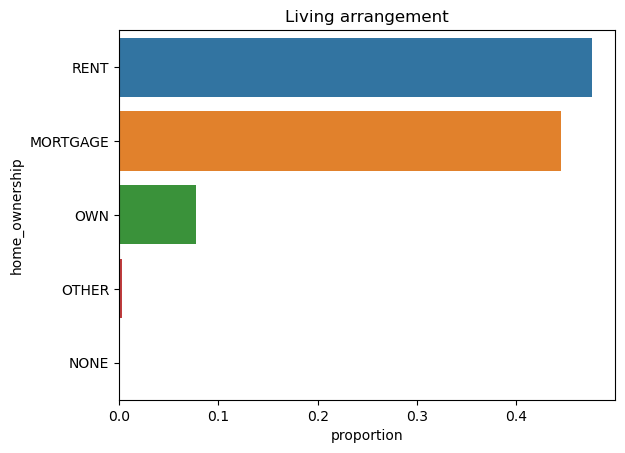

In [706]:
data = loan_eda_df['home_ownership'].value_counts(normalize = True).reset_index()
column = 'home_ownership'

sns.barplot(x = 'proportion', y = column, data = data)
plt.xlabel('proportion')
plt.ylabel(column)
plt.title('Living arrangement')

### Observation:

It is evident that most of the loan borrowers have either rented a house or have morgage on their house.

## Distribution of Loan Status

Text(0.5, 1.0, 'Loan Status')

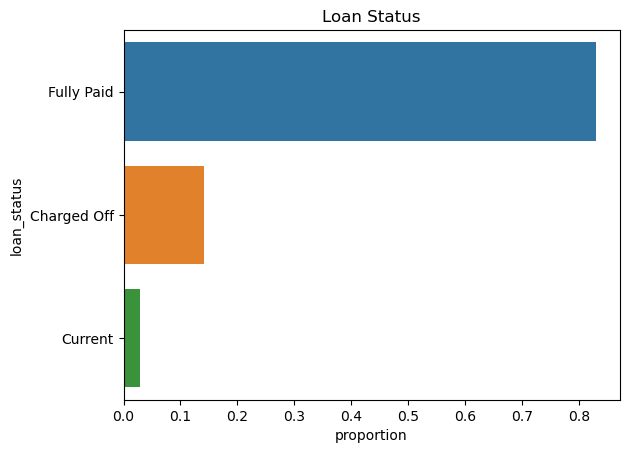

In [707]:
data = loan_eda_df['loan_status'].value_counts(normalize = True).reset_index()
column = 'loan_status'

sns.barplot(x = 'proportion', y = column, data = data)
plt.xlabel('proportion')
plt.ylabel(column)
plt.title('Loan Status')

### Observation:

Most of the loan disbursed by the bank has been paid back completely.

# Segmented Univariate Analysis

## Distribution of Loan Amount over different term for the loan

Text(0.5, 1.0, 'Term of loan amount')

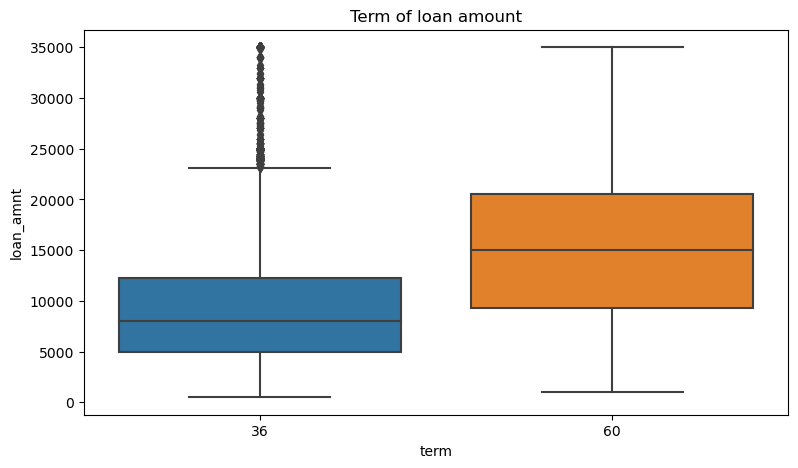

In [708]:
plt.figure(figsize = (20,5))
plt.subplot(121)
sns.boxplot(x = 'term', y = loan_eda_df['loan_amnt'], data = loan_eda_df)
plt.title('Term of loan amount')

### Observation:

Following can be interpreted from the plot above:
1. Loan with lower amount have a tenure of 36 months but there are loan of huge sum that are an outlier in this category meaning that there are loan with sum > 20000 having tenure of 36 moths
2. Loan with higher amount have a tenure of 60 months


## Distribution of Loan Amount over different home ownerships

Text(0.5, 1.0, 'Home ownership of loan borrowers')

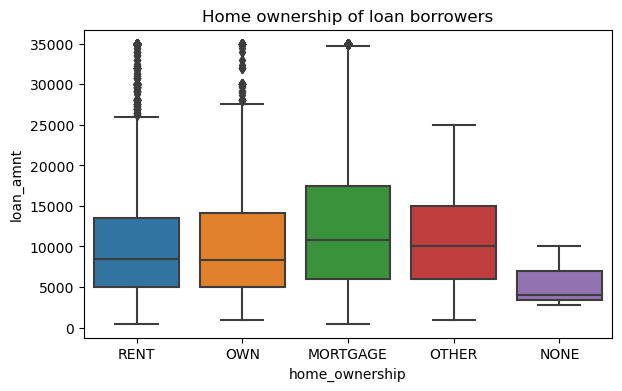

In [709]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.boxplot(x = 'home_ownership', y = loan_eda_df['loan_amnt'], data = loan_eda_df)
plt.title('Home ownership of loan borrowers')

### Observation:

Most of the borrowers are from the Mortgage owned homes. Additionally, the median loan amount is higher for the borrowers with mortgage owned homes.

## Distribution of Loan Amount over different verification status

Text(0.5, 1.0, 'Verification status of loans borrowerd')

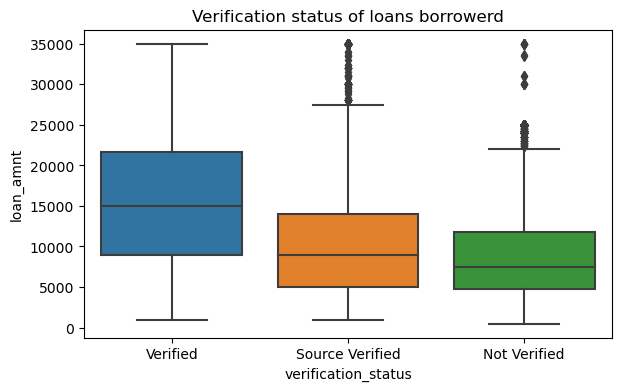

In [710]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.boxplot(x = 'verification_status', y = loan_eda_df['loan_amnt'], data = loan_eda_df)
plt.title('Verification status of loans borrowerd')

### Observation:

Most of the loan borrowed have been verified. Additonally, the median of loan disbursed is higher for the verified loans.

## Distribution of Interest Rate over different term for the loan

Text(0.5, 1.0, 'Interest rate for loans of different tenures')

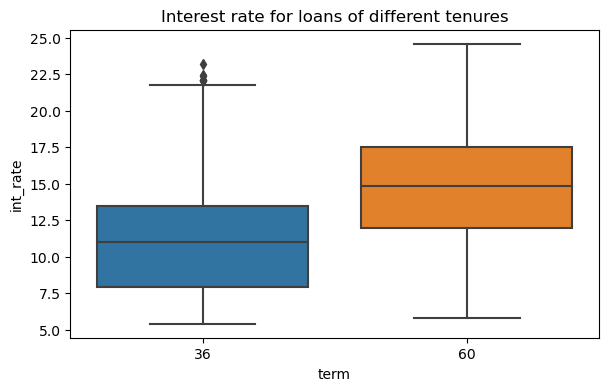

In [711]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.boxplot(x = 'term', y = loan_eda_df['int_rate'], data = loan_eda_df)
plt.title('Interest rate for loans of different tenures')

### Observation:

Mean interest rate is as high as 15% as compared with higher tenure loans of tenure with 60 months as compared to loans with lower tenure of 36 months having mean interest rate of 11%

## Distribution of Interest Rate over different year of issuing loan

Text(0.5, 1.0, 'Interest rate across years')

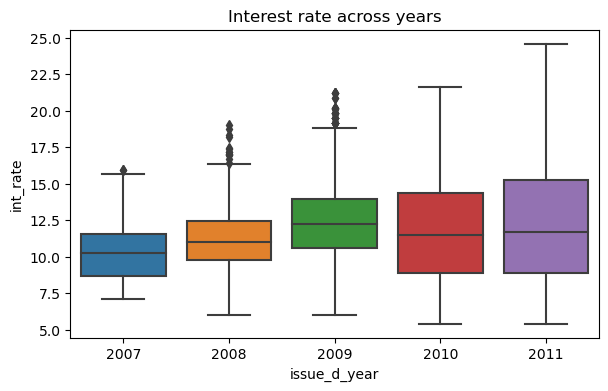

In [712]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.boxplot(x = 'issue_d_year', y = loan_eda_df['int_rate'], data = loan_eda_df)
plt.title('Interest rate across years')

### Observation:

Following can be observed from the plot above:
1. Loans distributed in 2007 & 2008 have lower interest rates between 10-11%
2. Mean interest rate increases year on year from 2007 to 2009 and then decrease from 2010 - 2011
3. Interest rates are closer to the mean for the # of loans distributed in 2007, 2008, & 2009 while the interest rates in 2010 & 2011 are further spread from the mean.

## Distribution of Loan Amount over different year of issuing loan

Text(0.5, 1.0, 'Loans distributed each year')

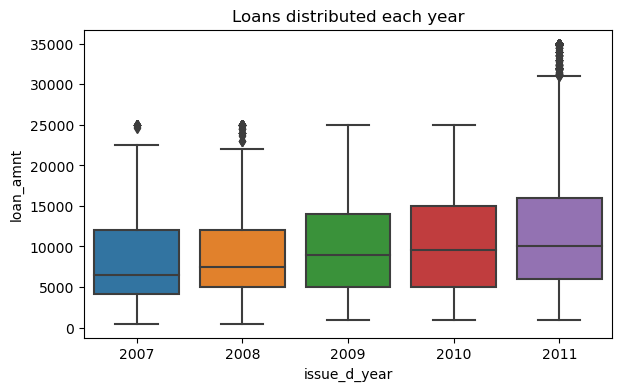

In [713]:
plt.figure(figsize = (15,4))
plt.subplot(121)
sns.boxplot(x = 'issue_d_year', y = loan_eda_df['loan_amnt'], data = loan_eda_df)
plt.title('Loans distributed each year')

### Observation:

Number of loans distributed show a gradual increase from 2007 to 2011

# Bivariate Analysis

### no. of people with different living arrangements that have fully paid or charged off the loan they have borrowed across different years

Text(0.5, 1.0, '# of people who fully paid/charged off the borrowed loan per year')

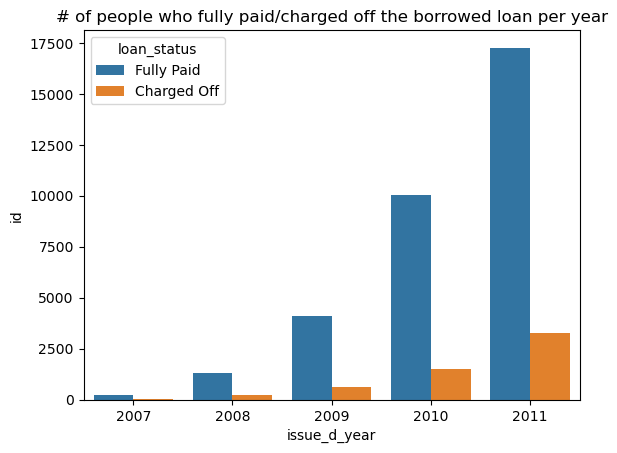

In [714]:
df = loan_eda_df.groupby(['issue_d_year', 'loan_status'], as_index = False)['id'].count()
sns.barplot(x = 'issue_d_year', y = 'id', hue = 'loan_status', data = df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('# of people who fully paid/charged off the borrowed loan per year')

### Observations:

Following can be interpreted from the plot above:
1. no. of loans distributed by the bank grows year of year
2. no. people who are fully paying back the borrowed sum also grows per year significantly
3. slight jump is observed for 2010 & 2011 in the # of borrowers that are defaulting and not paying back the borrowed

### no. of people that have fully paid or charged off the loan they have borrowed across different term

Text(0.5, 1.0, '# of people who fully paid/charged off the borrowed loan per term')

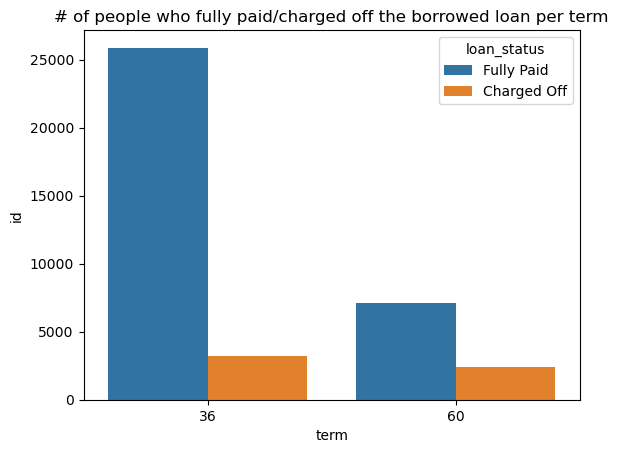

In [715]:
df = loan_eda_df.groupby(['term', 'loan_status'], as_index = False)['id'].count()
sns.barplot(x = 'term', y = 'id', hue = 'loan_status', data = df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('# of people who fully paid/charged off the borrowed loan per term')

### Observations

People with lesser term of the loan have a higher tendecy to fully pay back the borrowed loan.
OR
People who intend to fully back the loan ususally borrow the loan for a shorter term.

### no. of people with different living arrangements that have fully paid or charged off the loan they have borrowed

Text(0.5, 1.0, '# of people who fully paid/charged off the borrowed across different types of living arrangements')

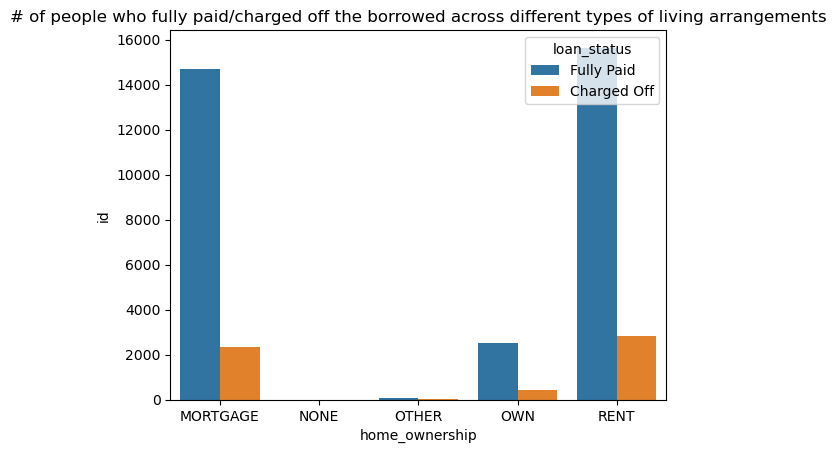

In [716]:
df = loan_eda_df.groupby(['home_ownership', 'loan_status'], as_index = False)['id'].count()
sns.barplot(x = 'home_ownership', y = 'id', hue = 'loan_status', data = df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('# of people who fully paid/charged off the borrowed across different types of living arrangements')

### Observations:

Following can be observed from the plot above:
1. Lesser number of loans have been disbursed for the poeple who own a house and are least likely to default a loan (not considering the 'OTHER' category)
2. People with Mortgage on their house are less likely to default on the borrowed loan as compared to people who have live in a rented house

### no. of people with different purpose for taking the loan that have fully paid or charged off the loan they have borrowed

Text(0.5, 1.0, '# of people who fully paid/charged off the borrowed with different purpose for the loan')

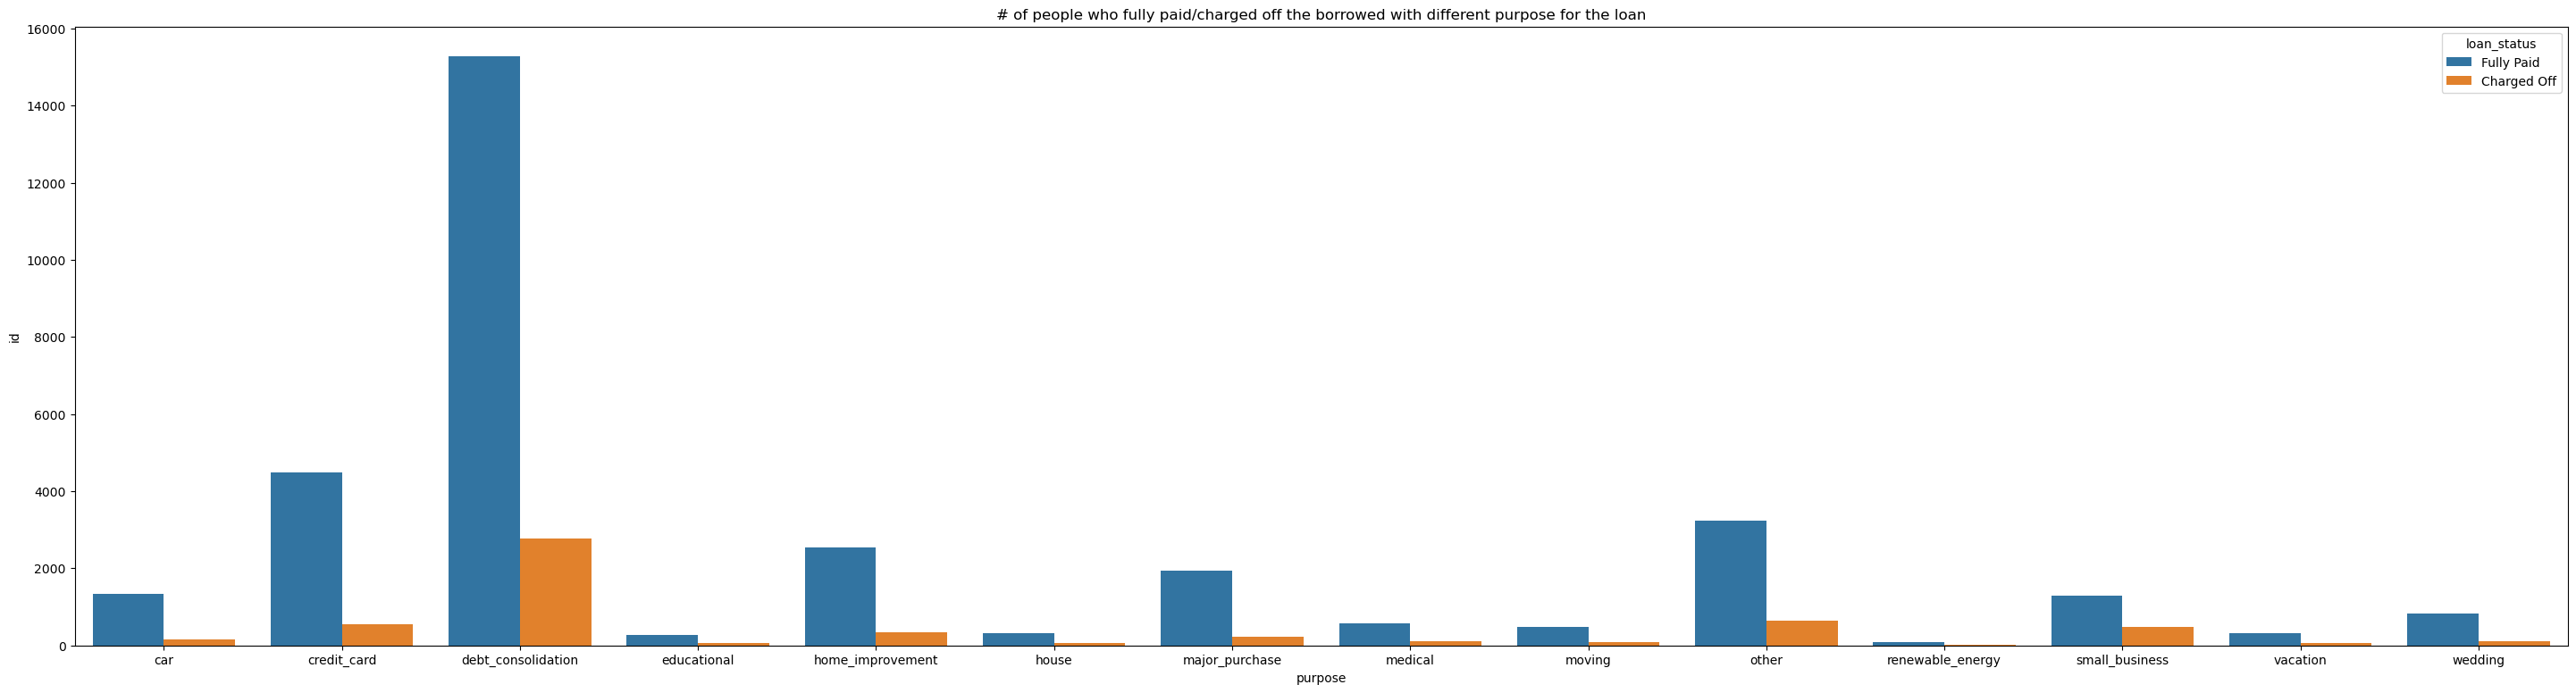

In [717]:
df = loan_eda_df.groupby(['purpose', 'loan_status'], as_index = False)['id'].count()
plt.figure(figsize = (36,9))
sns.barplot(x = 'purpose', y = 'id', hue = 'loan_status', data = df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('# of people who fully paid/charged off the borrowed with different purpose for the loan')

### Observations:

People who have borrowed the loan for debt consolidation a most likely to fully pay back the loan borrowed

# -------------------------------end of notebook---------------------------------------